In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler

In [6]:
spotify_songs = pd.read_csv('C:/Users/ebour/Documents/()_Ironhack DA Bootcamp/()_Labs/6_5_lab-api-wrappers/full_data.csv')

In [7]:
spotify_songs

,Unnamed: 0,track_name,artist_name,track_uri,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0,The Joker And The Queen (feat. Taylor Swift),Ed Sheeran,spotify:track:6N1K5OVVCopBjGViHs2IvP,0.528,0.309,-7.398,0.0329,0.9240,0.000002,0.2820,0.307,133.830,4
1,1,The Joker And The Queen (feat. Taylor Swift),Taylor Swift,spotify:track:6N1K5OVVCopBjGViHs2IvP,0.528,0.309,-7.398,0.0329,0.9240,0.000002,0.2820,0.307,133.830,4
2,2,Zo Zijn,sor,spotify:track:1q30hUyUUZyjytlKTJz4cI,0.411,0.507,-9.190,0.3360,0.6400,0.000000,0.1480,0.291,80.120,4
3,3,Options (feat. 24kGoldn),Internet Money,spotify:track:6bhgpD7OkCATudfKJ50JB6,0.768,0.781,-5.873,0.1540,0.1020,0.000000,0.0840,0.795,163.984,5
4,4,Options (feat. 24kGoldn),24kGoldn,spotify:track:6bhgpD7OkCATudfKJ50JB6,0.768,0.781,-5.873,0.1540,0.1020,0.000000,0.0840,0.795,163.984,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4400,78,Pass The Peas,The J.B.'s,spotify:track:7CjV22bm1Vx0guKm2HV3OD,0.561,0.311,-14.981,0.2650,0.2600,0.000237,0.3530,0.702,195.996,4
4401,79,Luscious Lady,Darondo,spotify:track:23LN1l3UQ4Qjg3YPzN8Yi7,0.698,0.669,-7.318,0.0445,0.0681,0.007890,0.0975,0.864,100.300,4
4402,80,Bustin' Out (On Funk),Rick James,spotify:track:0wYo8gcZCREyPoWOv0FzCX,0.726,0.698,-9.761,0.1090,0.1810,0.000001,0.2270,0.882,102.955,4
4403,81,Hyperbolicsyllablecsesquedalymistic - Album - ...,Isaac Hayes,spotify:track:1ZV8wsmSwudU1LmwpkoWxD,0.571,0.643,-7.243,0.0365,0.0315,0.030400,0.1100,0.662,178.341,4


Import data from PlayBack FM

In [164]:
pb_fm = pd.read_csv('C:/Users/ebour/Documents/()_Ironhack DA Bootcamp/()_Labs/6_5_lab-api-wrappers/pb_fm.csv')
pb_fm

,track_name,artist_name,track_id,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,Loser,3 Doors Down,1aC1IBAETh2XYGOE8kCC6t,0.493,0.880,-6.424,0.0693,0.010800,0.000027,0.2260,0.389,147.913,4
1,Hanging by a Moment,Lifehouse,0wqOReZDnrefefEsrIGeR4,0.541,0.864,-4.915,0.0357,0.001180,0.000000,0.0896,0.435,124.557,4
2,Kryptonite,3 Doors Down,6ZOBP3NvffbU4SZcrnt1k6,0.545,0.865,-5.708,0.0286,0.006640,0.000011,0.1680,0.543,99.009,4
3,Otherside,Red Hot Chili Peppers,64BbK9SFKH2jk86U3dGj2P,0.458,0.795,-3.265,0.0574,0.003160,0.000202,0.0756,0.513,123.229,4
4,Hemorrhage (In My Hands),Fuel,1sjrDQXqAa9V07FjKIlAQ4,0.301,0.823,-4.072,0.0433,0.000144,0.000309,0.0833,0.372,152.017,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4211,Champagne Life,Ne-Yo,7p8l7HiPoz90dg423iURKW,0.616,0.741,-4.155,0.1310,0.143000,0.000000,0.3470,0.593,193.069,3
4212,O Let's Do It,Waka Flocka Flame,31j3TZTZFrHvhmlhs7mXk8,0.542,0.541,-4.041,0.4630,0.003500,0.000000,0.2600,0.241,86.495,5
4213,Fistful of Tears,Maxwell,3uMigZrW9l9De8roOy6CAn,0.744,0.620,-6.995,0.0558,0.176000,0.000000,0.1010,0.701,123.032,3
4214,Lemonade,Gucci Mane,6rUcS9i07F6okIe8wujs5J,0.741,0.658,-7.758,0.0853,0.643000,0.000003,0.3070,0.746,142.057,4


In [165]:
spotify_songs.columns

Index(['Unnamed: 0', 'track_name', 'artist_name', 'track_uri', 'danceability',
       'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

In [166]:
pb_fm.columns

Index(['track_name', 'artist_name', 'track_id', 'danceability', 'energy',
       'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

In [167]:
full_data = pd.concat([spotify_songs.drop(['track_uri'],axis=1), pb_fm.drop(['track_id'],axis=1)], axis=0).reset_index(drop=True)

In [168]:
X = full_data.drop(['Unnamed: 0', 'track_name', 'artist_name'], axis=1)
X

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0.528,0.309,-7.398,0.0329,0.92400,0.000002,0.282,0.307,133.830,4
1,0.528,0.309,-7.398,0.0329,0.92400,0.000002,0.282,0.307,133.830,4
2,0.411,0.507,-9.190,0.3360,0.64000,0.000000,0.148,0.291,80.120,4
3,0.768,0.781,-5.873,0.1540,0.10200,0.000000,0.084,0.795,163.984,5
4,0.768,0.781,-5.873,0.1540,0.10200,0.000000,0.084,0.795,163.984,5
...,...,...,...,...,...,...,...,...,...,...
8616,0.616,0.741,-4.155,0.1310,0.14300,0.000000,0.347,0.593,193.069,3
8617,0.542,0.541,-4.041,0.4630,0.00350,0.000000,0.260,0.241,86.495,5
8618,0.744,0.620,-6.995,0.0558,0.17600,0.000000,0.101,0.701,123.032,3
8619,0.741,0.658,-7.758,0.0853,0.64300,0.000003,0.307,0.746,142.057,4


In [169]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler = scaler.fit(X)
X_prep = scaler.transform(X)

# KMEANS

In [170]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=1234)
kmeans.fit(X_prep)

KMeans(n_clusters=3, random_state=1234)

In [171]:
# Predicting / assigning the clusters:
clusters = kmeans.predict(X_prep)

# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

0    5495
1    1345
2    1781
dtype: int64

### Choosing k

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

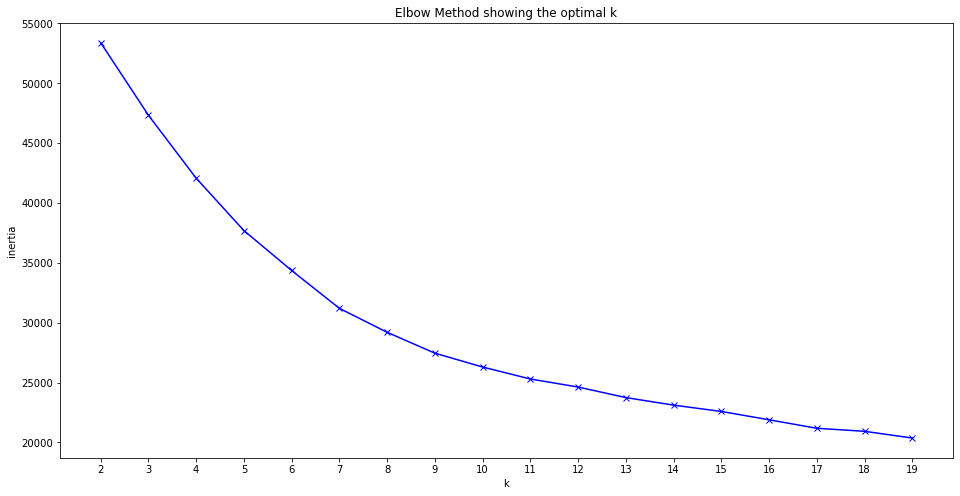

In [172]:
import numpy as np
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Silhouette score showing the optimal k')

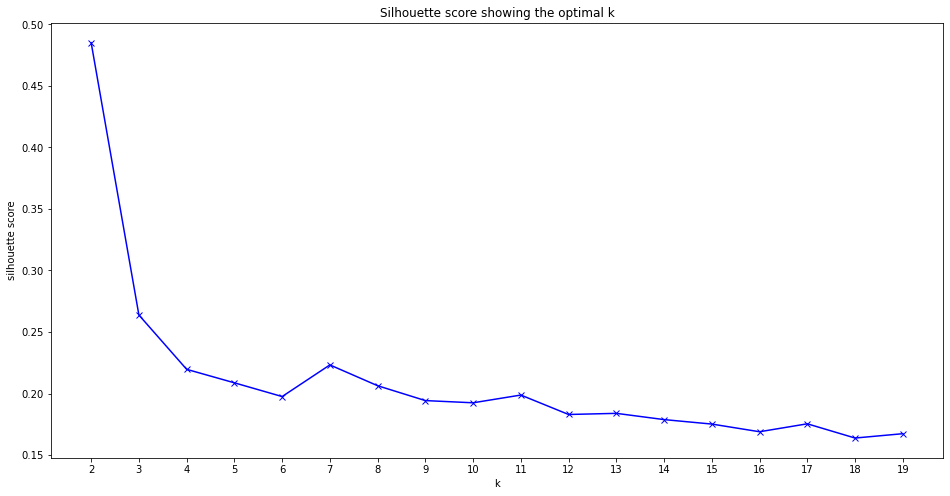

In [173]:
from sklearn.metrics import silhouette_score
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette score showing the optimal k')

With such an evolution of the silhouette score It is difficult to find the best compromise between silhouette and inertia.
I would say the best compromis is probably k=4 even if the elbow is not that significant for the inertia.

In [174]:
kmeans = KMeans(n_clusters=4, random_state=1234)
kmeans.fit(X_prep)
clusters = kmeans.predict(X_prep)
pd.Series(clusters).value_counts().sort_index()

0    4271
1    1335
2     534
3    2481
dtype: int64

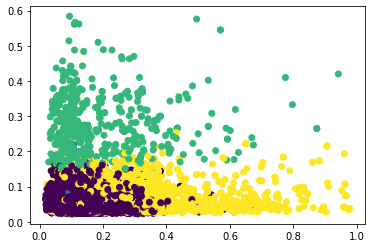

In [175]:
# If we try a chart with some of the original columns, let's see what the clusters look like
plt.scatter(full_data['liveness'],full_data['speechiness'], c = clusters)

# Agglomerative Clustering

### Linkage Single

In [176]:
single = cluster.AgglomerativeClustering(n_clusters=4, linkage='single')
clusters_agg_single = single.fit_predict(X_prep)

In [177]:
pd.Series(clusters_agg_single).value_counts().sort_index()

0      88
1    8530
2       1
3       2
dtype: int64

We end up with clusters of 1 or 2 songs amoung the four clusters and the remaining clusters are completely unbalanced. That is not applicable.

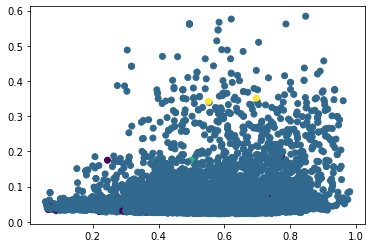

In [178]:
# If we try a chart with some of the original columns, let's see what the clusters look like
plt.scatter(full_data['danceability'],full_data['speechiness'], c = clusters_agg_single)

In [179]:
single = cluster.AgglomerativeClustering(n_clusters=8, linkage='single')
clusters_agg_single = single.fit_predict(X_prep)
pd.Series(clusters_agg_single).value_counts().sort_index()

0    8526
1      63
2       2
3       2
4      25
5       1
6       1
7       1
dtype: int64

Increasing the number of clusters does not solve the issue...

### Linkage Ward

In [180]:
ward_4 = cluster.AgglomerativeClustering(n_clusters=4, linkage='ward')
clusters_agg_ward_4 = ward.fit_predict(X_prep)
pd.Series(clusters_agg_ward_4).value_counts().sort_index()

0    6351
1    1106
2     736
3     337
4      91
dtype: int64

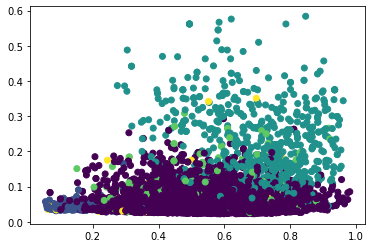

In [181]:
# If we try a chart with some of the original columns, let's see what the clusters look like
plt.scatter(full_data['danceability'],full_data['speechiness'], c = clusters_agg_ward_4)

In [182]:
ward_5 = cluster.AgglomerativeClustering(n_clusters=5, linkage='ward')
clusters_agg_ward_5 = ward_5.fit_predict(X_prep)
pd.Series(clusters_agg_ward_5).value_counts().sort_index()

0    6351
1    1106
2     736
3     337
4      91
dtype: int64

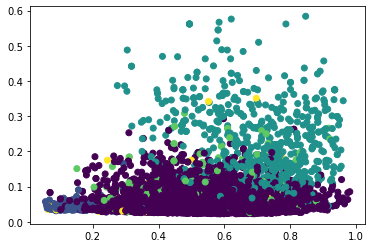

In [183]:
# If we try a chart with some of the original columns, let's see what the clusters look like
plt.scatter(full_data['danceability'],full_data['speechiness'], c = clusters_agg_ward_5)

In [184]:
ward_10 = cluster.AgglomerativeClustering(n_clusters=10, linkage='ward')
clusters_agg_ward_10 = ward_10.fit_predict(X_prep)
pd.Series(clusters_agg_ward_10).value_counts().sort_index()

0     736
1    2358
2     919
3    1247
4      91
5     741
6    1552
7     337
8     365
9     275
dtype: int64

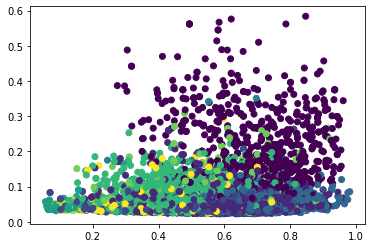

In [185]:
# If we try a chart with some of the original columns, let's see what the clusters look like
plt.scatter(full_data['danceability'],full_data['speechiness'], c = clusters_agg_ward_10)

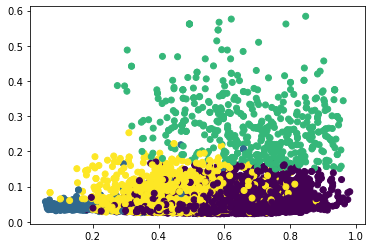

In [186]:
# If we try a chart with some of the original columns, let's see what the clusters look like with kmeans
plt.scatter(full_data['danceability'],full_data['speechiness'], c = clusters)

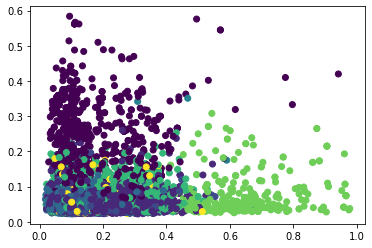

In [187]:
# If we try a chart with some of the original columns, let's see what the clusters look like
plt.scatter(full_data['liveness'],full_data['speechiness'], c = clusters_agg_ward_10)

In [188]:
full_data.columns

Index(['Unnamed: 0', 'track_name', 'artist_name', 'danceability', 'energy',
       'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

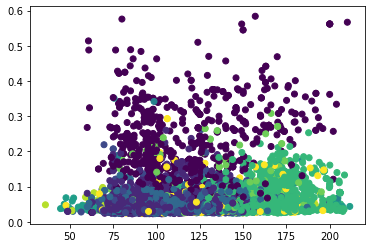

In [189]:
# If we try a chart with some of the original columns, let's see what the clusters look like
plt.scatter(full_data['tempo'],full_data['speechiness'], c = clusters_agg_ward_10)

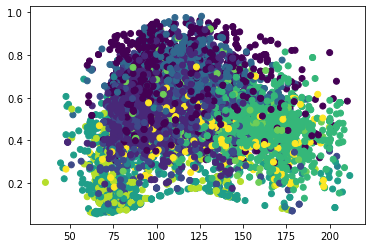

In [190]:
# If we try a chart with some of the original columns, let's see what the clusters look like
plt.scatter(full_data['tempo'],full_data['danceability'], c = clusters_agg_ward_10)

I would like my song advice to be accurate, so I'll go on with this latest clusterisation model for now.

In [191]:
# Let's put the cluster information back into the dataframe

In [192]:
print(full_data.shape)
print(len(clusters_agg_ward_10))

(8621, 13)
8621


In [193]:
# We have the correct number of rows in both sets
clusterized_data = full_data[['track_name', 'artist_name']].copy()
clusterized_data['cluster'] = clusters_agg_ward_10
clusterized_data

,track_name,artist_name,cluster
0,The Joker And The Queen (feat. Taylor Swift),Ed Sheeran,2
1,The Joker And The Queen (feat. Taylor Swift),Taylor Swift,2
2,Zo Zijn,sor,0
3,Options (feat. 24kGoldn),Internet Money,0
4,Options (feat. 24kGoldn),24kGoldn,0
...,...,...,...
8616,Champagne Life,Ne-Yo,9
8617,O Let's Do It,Waka Flocka Flame,0
8618,Fistful of Tears,Maxwell,9
8619,Lemonade,Gucci Mane,3


In [194]:
clusterized_data[clusterized_data['cluster']==2].head(10)

,track_name,artist_name,cluster
0,The Joker And The Queen (feat. Taylor Swift),Ed Sheeran,2
1,The Joker And The Queen (feat. Taylor Swift),Taylor Swift,2
25,Laat De Wereld Maar Draaien,Sterre Koning,2
26,Laat De Wereld Maar Draaien,Waylon,2
34,2am,Foals,2
49,Don't Fade,Vance Joy,2
67,Heartlands,Paulusma,2
68,Heartlands,De Troubadours,2
72,Deal With It,Pearl Ramos,2
75,Focus,GOSTO,2


In [195]:
clusterized_data[clusterized_data['cluster']==0].head(10)

,track_name,artist_name,cluster
2,Zo Zijn,sor,0
3,Options (feat. 24kGoldn),Internet Money,0
4,Options (feat. 24kGoldn),24kGoldn,0
6,Zoveel Takkies,Josylvio,0
11,Khabib,Central Cee,0
12,Je Blik Richting Mij,Bankzitters,0
17,City of Gods,Fivio Foreign,0
18,City of Gods,Kanye West,0
19,City of Gods,Alicia Keys,0
21,MIJ ZIJN,Mula B,0


In [196]:
clusterized_data[clusterized_data['cluster']==7].head(15)

,track_name,artist_name,cluster
33,Season Of Your Dreams,Douwe Bob,7
41,Fear Of The Dawn,Jack White,7
81,Nothing Good Comes Easy,Felix Cartal,7
82,Nothing Good Comes Easy,Elohim,7
105,Cry,Cat & Calmell,7
210,Ginseng Strip 2002,Yung Lean,7
249,Little Bit of Feel Good,Jamie Lidell,7
266,Private Number,William Bell,7
267,Private Number,Judy Clay,7
270,W.E.L.F.A.R.E,Antonio Castro,7


Listening to the songs per cluster, I can find a logic in each of them, even if there are sometimes surprising songs. I'll stick to those clusters

In [197]:
clusterized_data.to_csv('clusterized_data.csv', index=False)

In [140]:
# # export clusterization model
# import pickle
# filename = 'spotify_cluster_model.sav'
# pickle.dump(ward_10, open(filename, 'wb'))

In [ ]:
# put as comment as I chose another model in the end (see below)

# Try to find the cluster for one song

In [198]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import getpass
c_id = getpass.getpass()

········


In [199]:
c_secret = getpass.getpass()

········


In [200]:
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=c_id,client_secret=c_secret))

In [201]:
my_song_title = 'youth'
my_song_artist = 'daughter'

# id = '2Ck6gblyk3UFCVPTh8o3TN'

res = sp.search(q='track:' + my_song_title, type='track')
data = pd.DataFrame(res['tracks']['items'])
data['name'] = data['name'].apply(lambda x: x.lower())
data = data[data['name'] == my_song_title].reset_index(drop = True)
if len(data['artists'])>1:
    artist_input = my_song_artist.lower()
    for i in range(len(data['artists'])):
        art = data['artists'][i][0]['name'].lower()
        if art == artist_input:
            track_id = data['id'][i]
            break
else:
    track_id =  data['id'][0]
track_uri = 'spotify:track:' + track_id
audio_features = sp.audio_features(track_uri)[0]
audio_features

{'danceability': 0.4,
 'energy': 0.525,
 'key': 0,
 'loudness': -11.294,
 'mode': 1,
 'speechiness': 0.0435,
 'acousticness': 0.887,
 'instrumentalness': 0.00543,
 'liveness': 0.117,
 'valence': 0.408,
 'tempo': 146.977,
 'type': 'audio_features',
 'id': '4AmcmraFjVzFb9SQDNTRyl',
 'uri': 'spotify:track:4AmcmraFjVzFb9SQDNTRyl',
 'track_href': 'https://api.spotify.com/v1/tracks/4AmcmraFjVzFb9SQDNTRyl',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/4AmcmraFjVzFb9SQDNTRyl',
 'duration_ms': 253013,
 'time_signature': 4}

In [202]:
audio_features = pd.DataFrame(audio_features, index=[0])
audio_features = audio_features[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']]
audio_features

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0.4,0.525,-11.294,0.0435,0.887,0.00543,0.117,0.408,146.977,4


In [203]:
audio_feat_prep = scaler.transform(audio_features)
audio_feat_prep

array([[-0.76529566, -0.33555403, -0.24119219, -0.34825565,  1.75539846,
        -0.45666089, -0.40704125, -0.21249639,  0.863618  ,  0.21865952]])

In [204]:
my_song_cluster = ward_10.predict(audio_feat_prep)
my_song_cluster

AttributeError: 'AgglomerativeClustering' object has no attribute 'predict'

## It is impossible to predict the cluster for a new set of data with the agglomerative clustering.
I'll thus stick to the Kmean cluster I model I have created earlier.

In [205]:
my_song_cluster = kmeans.predict(audio_feat_prep)
my_song_cluster

array([0])

It seems to work with this model ! Let's export it

In [206]:
# export clusterization model
filename = 'spotify_cluster_model.sav'
pickle.dump(kmeans, open(filename, 'wb'))

In [207]:
# export scaler
filename_scaler = 'spotify_scaler.sav'
pickle.dump(scaler, open(filename_scaler, 'wb'))